## Exercise in Photogrammetry I
## **Ex.2 : Computer Vision**
### Hand out: xx.xx.xxxx
### Submission: xx.xx.xxxx
### Points: 22

## A Numpy
### A1 Initialization
Numpy is the most used module for numerical applications in python.
**Tasks:**
1. import numpy (0.5 Points)
2. create and print a ... (2.5 Points)
   - ... 3x4 matrix with zeros
   - ... 4x3x3 matrix with ones
   - ... 3x3 identity matrix
   - ... 4x6 matrix with uniformly distributed values in the range of [0,1]. **Hint:** For reproducable results we can set a seed value by the function *np.random.seed(value)*
   - ... array with the values from 0 to 4 (integer)

In [15]:
# Import numpy here as np
import numpy as np

In [4]:
# Zero matrix
matrix1 = np.zeros((3,4))
print(matrix1)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
# Ones: 3 dimensional matrix
matrix2 = np.ones((4,3,3))
print(matrix2)

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [7]:
# Identity Matrix
matrix3 = np.eye(3)
print(matrix3)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [11]:
# uniformly distributed matrix
matrix4 = np.zeros((4,6))
for i in range(len(matrix4)):
    for j in range(len(matrix4[0])):
        matrix4[i, j] = np.random.rand()
print(matrix4)

[[0.26269458 0.27788825 0.58160103 0.13276634 0.52940798 0.76453053]
 [0.94512102 0.6030743  0.57720829 0.83457448 0.00500784 0.95398403]
 [0.90458246 0.60958647 0.12330454 0.02777414 0.23518865 0.7831351 ]
 [0.4092037  0.43253342 0.56860436 0.15942634 0.06009946 0.19801699]]


In [14]:
# arange
matrix5 = np.arange(5)
print(matrix5)

[0 1 2 3 4]


## Images: Cube Slicing
In this course we will deal a lot with images, so that the handling of these should feel quite familiar to you.
An image in python is typically represented as a 3 dimensional numpy array *(rows, cols, channel)*. We will use matplotlib for the visualization and skimage for reading and writing to disk. 

**Task:** Import *pyplot* from *matplotlib* as well as *skimage.io*. (1 Point)

In [2]:
# Import pyplot and skimage.io, enable inline matplotlib
import matplotlib.pyplot as plt
from skimage import io

**Tasks:**
1. Load and visualize the image: *images/cube.jpg* (1 Point)
2. print the shape of the image as well as the underlying data type. (1 Point)
3. create two variables which hold the left and the right half of the image, respectively. Make sure that both parts have the same size and plot both images. **Hint:** use subplots (see example below) (3 Points)
4. flip the right image vertically. (1 Point)
5. Convert the left and the right flipped image to uint8 for later computations.  (1 Points)
6. Compute the absolute difference between the left and the right flipped image. (1 Point)
7. Convert the difference image back to uint8 and visualize it. (1 Point)

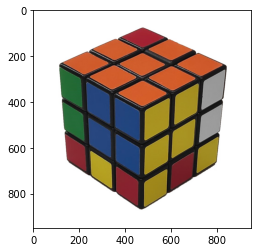

In [3]:
# Load and visualize image
import matplotlib.image as img
img = img.imread('./images/cube.jpg')
plt.imshow(img)

In [4]:
# print the shape and underlying data type
print("image shape: ", img.shape)
print("data type: ", img.dtype)

image shape:  (950, 950, 3)
data type:  uint8


In [10]:
# Split image in left and right half:
raw_size = img.shape[1]
img_left = img[:, 0:int(raw_size/2), :]
img_right = img[:, int(raw_size/2):, :]

# print shapes:
print("left image shape: ", img_left.shape)
print("right image shape: ", img_right.shape)

left image shape:  (950, 475, 3)
right image shape:  (950, 475, 3)


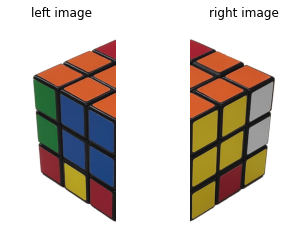

In [13]:
# Visualize left and right part
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img_left)
ax1.set_title('left image')
ax1.axis("off")

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(img_right)
ax2.set_title('right image')
ax2.axis("off")

plt.show()

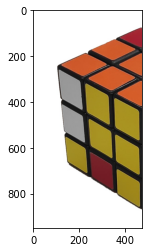

In [19]:
# flip right image and plot the result:
flip_img_right = np.flip(img_right, axis=1)
plt.imshow(flip_img_right)

In [27]:
# Convert to float 
img_left =img_left.astype(np.float64)
flip_img_right = flip_img_right.astype(np.float64)

print("left image type: ", img_left.dtype)
print("flip rifht image type: ", flip_img_right.dtype)

left image type:  float64
flip rifht image type:  float64


In [24]:
# compute difference here:
difference_ = img_left - flip_img_right

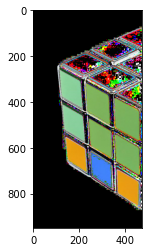

In [25]:
# Convert to uint8:
difference_ = difference_.astype(np.uint8)

# Plot differences:
plt.imshow(difference_)

**Task:** What is the meaning of the **colored** areas in the difference image? Why are some parts of the image black?

Write your answer here:


# Point Transformation 
Points will be the second most important data type after images in this course. 
In the following we have given an L-shaped point cloud [2xn] (*n=200*), on which we want to apply some transformations. Visualizing points can be done in a very similar way as in matlab (with the function *plt.plot(x,y,...)* )

**Tasks:**
1. Visualize the point cloud. (1 Point)
1. Write a function angle2rotMat(...) that returns the rotation matrix [2x2] for a given rotation angle (in degree). (1 Point)
2. Write for the function a Header which describes what the function is doing, as well as the input and output parameter. **Hint** An example of this can be seen in the first tutorial. (1 Point)
3. Create the 2 rotation matrices *R1* and *R2*: the first with an angle of 30[degree] and the second with an angle of 60[degree]. Print both matrices. (1 Point)
4. Rotate the given point cloud by *R1* and save the result in *points_r1*. Be aware of the difference between a matrix multiplication and an elementwise multiplication. (0.5 Points)
5. Rotate *points_r1* by *R2* and save the result in *points_r2*. (0.5 Points)
6. Shift points_r2 by the *translation=(3,4)^T* and save the result in *points_t*. (1 Points)
7. Create a figure with 4 subplots. Plot *points*, *points_r1*, *points_r2* and *points_t* in the created subplots, respectively. (3 Points)

In [28]:
# generating an L-shaped point cloud.
np.random.seed(0)
points = np.hstack([np.array([[5,0.5]]).T* np.random.rand(2,100),np.array([[0.5,5]]).T*np.random.rand(2,100)])
print('Point cloud dimension:',points.shape)

Point cloud dimension: (2, 200)


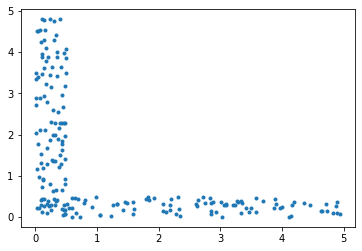

In [30]:
# Plot points here
x = points[0, :]
y = points[1, :]
plt.plot(x, y, '.')

In [69]:
# write angle2rotMat(...):
def angle2rotMat(angle_deg):
    rotMat = np.eye(2, dtype=np.float)
    angle_rad = angle_deg * np.pi/180
    rotMat[0, 0] = np.cos(angle_rad)
    rotMat[0, 1] = np.sin(angle_rad) * -1
    rotMat[1, 0] = np.sin(angle_rad)
    rotMat[1, 1] = np.cos(angle_rad)
    return rotMat

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


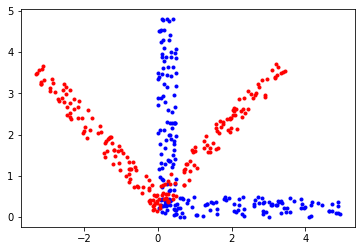

In [71]:
# create rotation matrices
sample = np.copy(points)

rotMat = angle2rotMat(45)
print(rotMat)
sample = np.matmul(rotMat, sample)

x = points[0, :]
y = points[1, :]
plt.plot(x, y, '.b')

x_ = sample[0, :]
y_ = sample[1, :]
plt.plot(x_, y_, '.r')

# z 축을 기준으로 반시계 방향으로 degree 만큼 회전

In [78]:
# create rotation matrix
r1 = angle2rotMat(30)
r2 = angle2rotMat(60)

print("rotMat 30(deg): \n", r1)
print("rotMat 60(deg): \n", r2)

# apply Rotations
points_r1 = np.matmul(r1, points)
points_r2 = np.matmul(r2, points_r1)

rotMat 30(deg): 
 [[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]
rotMat 60(deg): 
 [[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]


In [84]:
# create translation vector
t = np.transpose(np.array([3, 4]))
t = t.reshape(2, 1)

# apply Transformations 
points_t = points + t

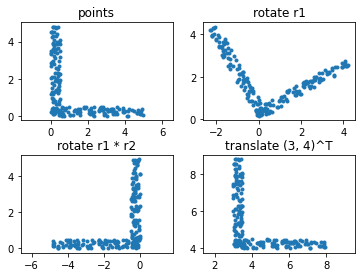

In [91]:
# create subplots and plot the results
fig = plt.figure()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(points[0, :], points[1, :], '.')
ax1.set_title('points')
ax1.axis('equal')

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(points_r1[0, :], points_r1[1, :], '.')
ax2.set_title('rotate r1')
ax2.axis('equal')

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(points_r2[0, :], points_r2[1, :], '.')
ax3.set_title('rotate r1 * r2')
ax3.axis('equal')

ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(points_t[0, :], points_t[1, :], '.')
ax4.set_title('translate (3, 4)^T')
ax4.axis('equal')

plt.show()

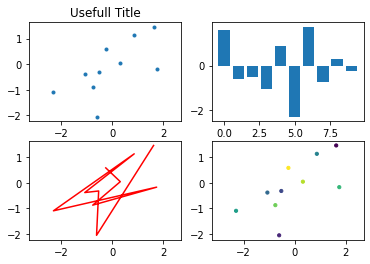

In [76]:
# Matplotlib example: Subplots

# create Some data
np.random.seed(1)
some_data = np.random.randn(2,10)

# Define Subplots
fig_ex1, axes_ex1 = plt.subplots(nrows=2,ncols=2)

# Assign 
# Draw points
axes_ex1[0,0].plot(some_data[0], some_data[1],marker='.',linestyle='')
axes_ex1[0,0].set_title('Usefull Title')
axes_ex1[0,0].axis('equal')

# Plot Bars
axes_ex1[0,1].bar(np.arange(10), some_data[0])

# Connect points by lines
axes_ex1[1,0].plot(some_data[0], some_data[1],linestyle='-',color='r')
axes_ex1[1,0].axis('equal')

# Draw points (optional: different, )
axes_ex1[1,1].scatter(some_data[0], some_data[1], s=10, c=np.arange(10), cmap='viridis')
axes_ex1[1,1].axis('equal')
plt.show()